In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# Load the data
data = pd.read_csv('C:/Users/lucaw/Desktop/School/2023-2024/Project 2-2/Project 2-2 code/Project2-2/Project_2-2/NL_data/ams.csv')
data.head()

,time,t2m
0,2010-01-01 00:00:00,273.37634
1,2010-01-01 01:00:00,273.35657
2,2010-01-01 02:00:00,273.28820
3,2010-01-01 03:00:00,273.26855
4,2010-01-01 04:00:00,273.21570


In [8]:

def forecast_temperature(data, window_size, prediction_horizon):
   
    # Convert 'time' to datetime
    data['time'] = pd.to_datetime(data['time'])

    # Create lagged features
    for i in range(1, window_size + 1):
        data[f't2m_last_{i}'] = data['t2m'].shift(i)

    # Create the target variable by shifting
    data['t2m_future'] = data['t2m'].shift(-prediction_horizon)

    # Drop rows with NaN values which are the result of shifting
    data = data.dropna()

    # Re-establish 'time' as the DataFrame's index
    data.set_index('time', inplace=True)

    # Splitting data into features and target
    X = data[[f't2m_last_{i}' for i in range(1, window_size + 1)]]
    y = data['t2m_future']
    
    return X, y
    

In [9]:
X, y = forecast_temperature(data, window_size=72, prediction_horizon=0)

In [10]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the model
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
train_score = round(reg.score(X_train, y_train) * 100, 2)
valid_score = round(reg.score(X_test, y_test) * 100, 2)

print('Mean Squared Error (MSE):', mse)
print('Train_score:', train_score)
print('Valid_score:', valid_score)


Mean Squared Error (MSE): 0.2731840128943825
Train_score: 99.38
Valid_score: 99.3


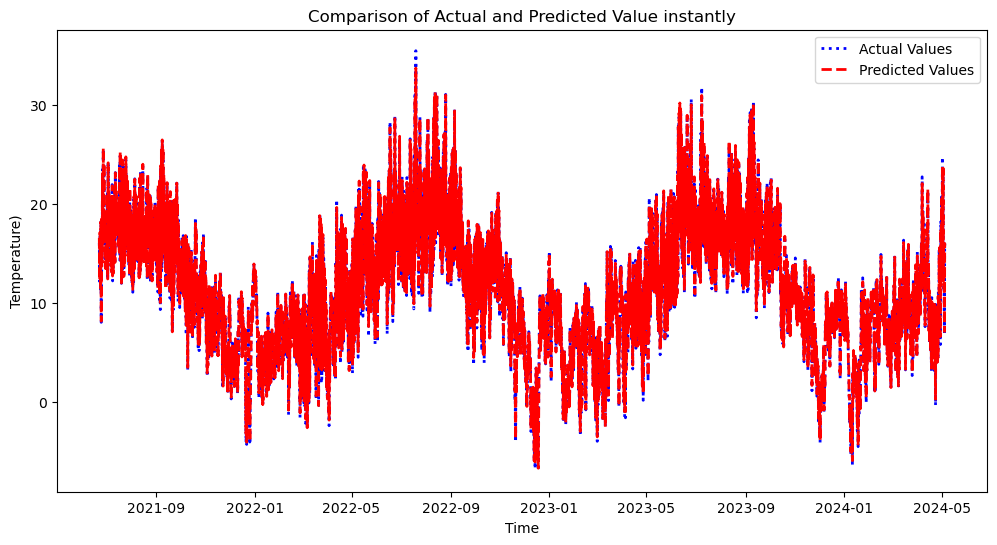

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test - 273.15, color='blue', label='Actual Values', linewidth=2, linestyle='dotted')
plt.plot(y_test.index, y_pred - 273.15, color='red', label='Predicted Values', linewidth=2, linestyle='--')
plt.title('Comparison of Actual and Predicted Value instantly')
plt.xlabel('Time')
plt.ylabel('Temperature)')
plt.legend()
plt.show()

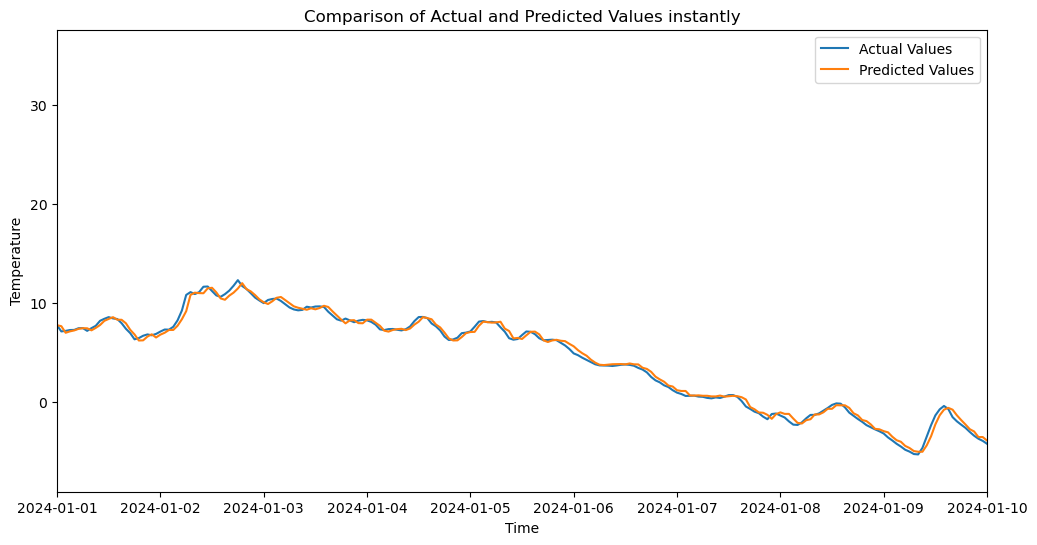

In [12]:

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test - 273.15,  label='Actual Values')
plt.plot(y_test.index, y_pred - 273.15,  label='Predicted Values')
plt.title('Comparison of Actual and Predicted Values instantly')
# Define the zoom range
zoom_start = pd.Timestamp('2024-01-01')
zoom_end = pd.Timestamp('2024-01-10') 

# Set the x-axis limit to zoom into the desired timeframe
plt.xlim(zoom_start, zoom_end)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [14]:
X, y = forecast_temperature(data, window_size=72, prediction_horizon=24)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the model
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
train_score = round(reg.score(X_train, y_train) * 100, 2)
valid_score = round(reg.score(X_test, y_test) * 100, 2)
print('Mean Squared Error (MSE):', mse)
print('Train_score:', train_score)
print('Valid_score:', valid_score)



Mean Squared Error (MSE): 6.842015020441571
Train_score: 84.79
Valid_score: 82.52


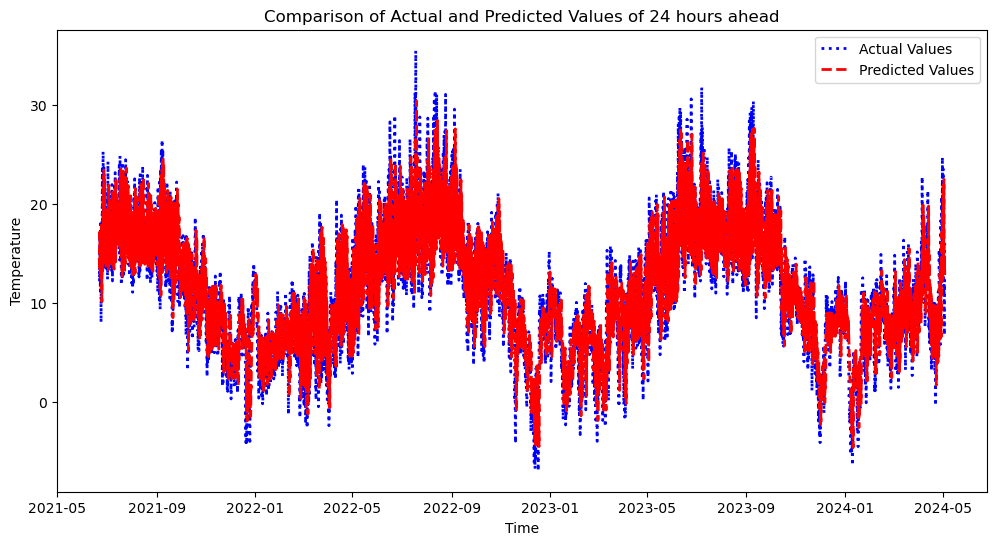

In [15]:

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test - 273.15, color='blue', label='Actual Values', linewidth=2, linestyle='dotted')
plt.plot(y_test.index, y_pred - 273.15, color='red', label='Predicted Values', linewidth=2, linestyle='--')
plt.title('Comparison of Actual and Predicted Values of 24 hours ahead')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

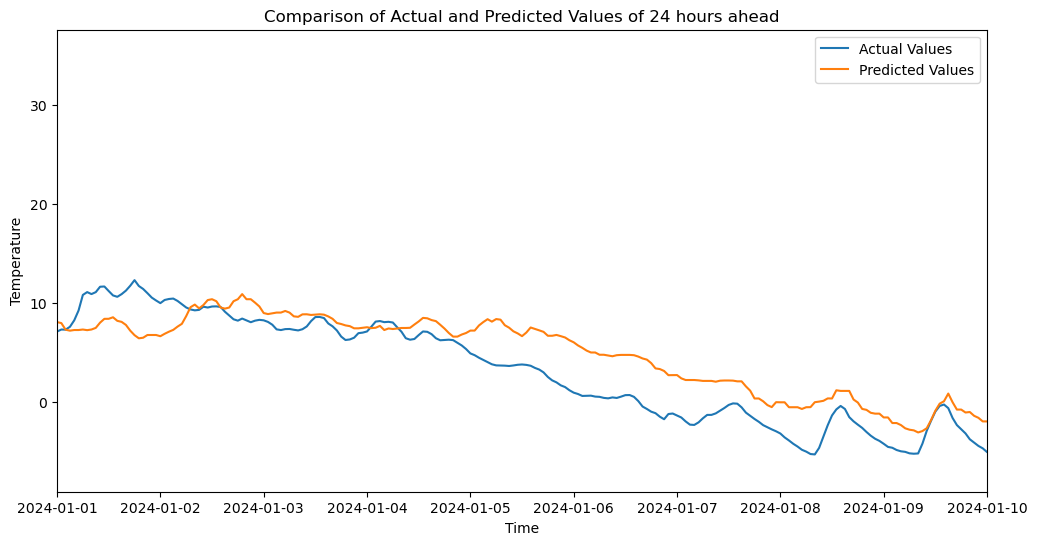

In [16]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test - 273.15, label='Actual Values')
plt.plot(y_test.index, y_pred - 273.15, label='Predicted Values')
zoom_start = pd.Timestamp('2024-01-01')
zoom_end = pd.Timestamp('2024-01-10') 

# Set the x-axis limit to zoom into the desired timeframe
plt.xlim(zoom_start, zoom_end)
plt.title('Comparison of Actual and Predicted Values of 24 hours ahead')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [17]:
X, y = forecast_temperature(data, window_size=72, prediction_horizon=72)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the model
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
train_score = round(reg.score(X_train, y_train) * 100, 2)
valid_score = round(reg.score(X_test, y_test) * 100, 2)

print('Mean Squared Error (MSE):', mse)
print('Train_score:', train_score)
print('Valid_score:', valid_score)


Mean Squared Error (MSE): 11.531603148163141
Train_score: 73.15
Valid_score: 70.56


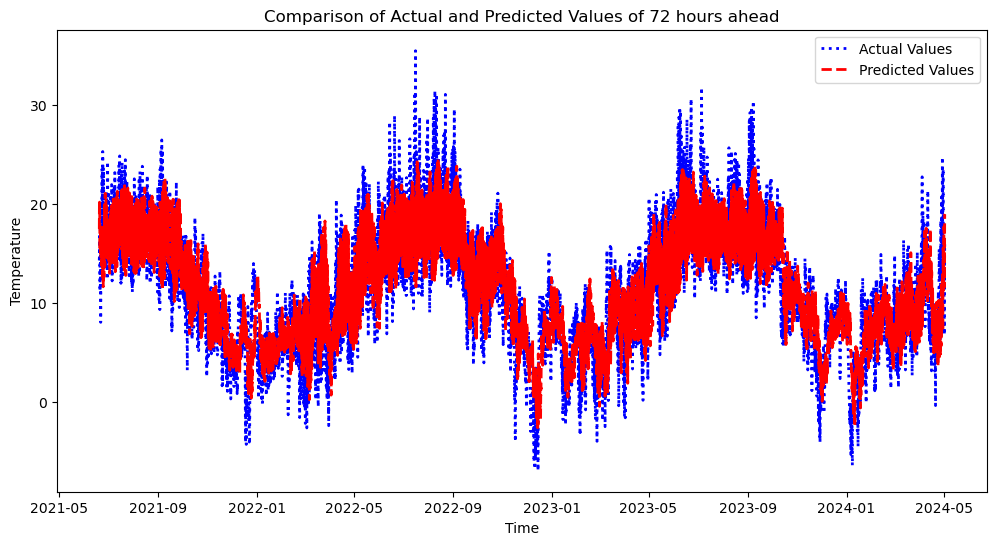

In [18]:

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test - 273.15, color='blue', label='Actual Values', linewidth=2, linestyle='dotted')
plt.plot(y_test.index, y_pred - 273.15, color='red', label='Predicted Values', linewidth=2, linestyle='--')
plt.title('Comparison of Actual and Predicted Values of 72 hours ahead')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

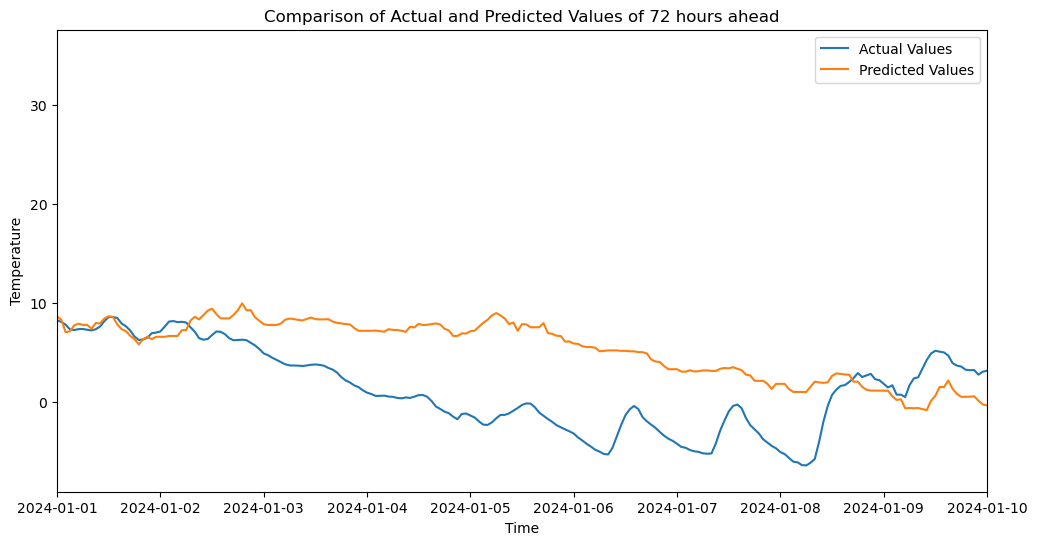

In [19]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test - 273.15, label='Actual Values')
plt.plot(y_test.index, y_pred - 273.15, label='Predicted Values')
zoom_start = pd.Timestamp('2024-01-01')
zoom_end = pd.Timestamp('2024-01-10') 

# Set the x-axis limit to zoom into the desired timeframe
plt.xlim(zoom_start, zoom_end)
plt.title('Comparison of Actual and Predicted Values of 72 hours ahead')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [21]:
# Load the data
train_data = pd.read_csv('C:/Users/lucaw/Desktop/School/2023-2024/Project 2-2/Project 2-2 code/Project2-2/Project_2-2/NL_data/ams.csv')
test_data = pd.read_csv('/Users/lucaw/Desktop/School/2023-2024/Project 2-2/forecast.csv')

In [22]:
ams_df = test_data[(test_data['latitude'] == 52.25) & (test_data['longitude'] == 5.0)]
ams_df = ams_df.drop(['Unnamed: 0', 'latitude', 'step', 'number', 'valid_time','longitude', 'surface'], axis=1)
test_data = ams_df

In [23]:
# Convert 'time' to datetime
train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

In [24]:
dummy_train_data = train_data.tail(1)
dummy_train_data = dummy_train_data.loc[dummy_train_data.index.repeat(10)]
dummy_train_data['time'] = dummy_train_data['time'] + pd.to_timedelta(dummy_train_data.groupby("time").cumcount(),unit='h')
dummy_train_data = dummy_train_data[1:]

In [25]:
import datetime
full_data = pd.concat([train_data, dummy_train_data, test_data])

aug_test_data = full_data[full_data['time'] >= pd.to_datetime(datetime.date(2024, 4, 29))]
aug_test_data.shape

(504, 2)

In [26]:
# Create features for training data
window_size = 71
for i in range(1, window_size + 1):
    train_data[f't2m_last_{i}'] = train_data['t2m'].shift(i)

# Create the target variable by shifting
prediction_horizon = 72
train_data['t2m_future'] = train_data['t2m'].shift(-prediction_horizon)

# Drop rows with NaN values which are the result of shifting
train_data = train_data.dropna()

# Re-establish 'time' as the DataFrame's index for training data
train_data.set_index('time', inplace=True)

# Splitting training data into features and target
X_train = train_data[[f't2m_last_{i}' for i in range(1, window_size + 1)]]
y_train = train_data['t2m_future']
    
# Process augmented test data to create features
for i in range(1, window_size + 1):
    aug_test_data[f't2m_last_{i}'] = aug_test_data['t2m'].shift(i)

# Create the target variable by shifting
aug_test_data['t2m_future'] = aug_test_data['t2m'].shift(-prediction_horizon)    

# Drop rows with NaN values which are the result of shifting in test data
aug_test_data = aug_test_data.dropna()

# Drop extra data
aug_test_data = aug_test_data[aug_test_data['time'] >= pd.to_datetime(datetime.date(2024, 5, 2))]

# Re-establish 'time' as the DataFrame's index for test data
aug_test_data.set_index('time', inplace=True)

# Splitting test data into features and target
X_test = aug_test_data[[f't2m_last_{i}' for i in range(1, window_size + 1)]]
y_test = aug_test_data['t2m_future']

C:\Users\lucaw\AppData\Local\Temp\ipykernel_16356\1727179000.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_test_data[f't2m_last_{i}'] = aug_test_data['t2m'].shift(i)
C:\Users\lucaw\AppData\Local\Temp\ipykernel_16356\1727179000.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_test_data[f't2m_last_{i}'] = aug_test_data['t2m'].shift(i)
C:\Users\lucaw\AppData\Local\Temp\ipykernel_16356\1727179000.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [27]:
# Initialize and train the model
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
train_score = round(reg.score(X_train, y_train) * 100, 2)
valid_score = round(reg.score(X_test, y_test) * 100, 2)

print('Mean Squared Error (MSE):', mse)
print('Train_score:', train_score)
print('Valid_score:', valid_score)

Mean Squared Error (MSE): 11.417919273466605
Train_score: 72.78
Valid_score: 27.33


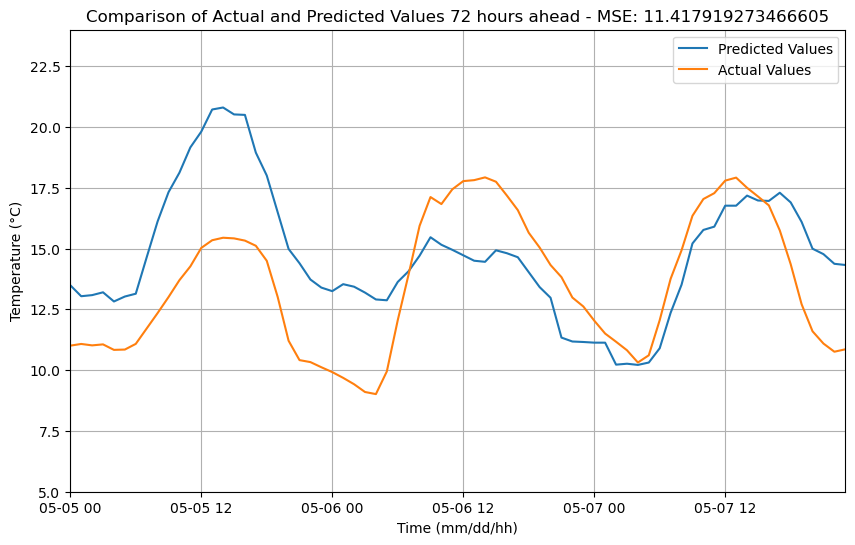

In [33]:
# Set correct time index
y_test_t = y_test.set_axis(y_test.index + pd.Timedelta(days=3))
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))

# Plot predicted values
plt.plot(y_test_t.index, y_pred - 273.15, label='Predicted Values')
# Plot actual values
plt.plot(y_test_t.index, y_test_t - 273.15, label='Actual Values')

# Define the zoom range
zoom_start = pd.Timestamp('2024-05-05')
zoom_end = pd.Timestamp('2024-05-07 23:00:00')

# Set the x-axis limit to zoom into the desired timeframe
plt.xlim(zoom_start, zoom_end)
plt.ylim(5, 24)

# Title and labels
plt.title(f'Comparison of Actual and Predicted Values 72 hours ahead - MSE: {mse}')
plt.xlabel('Time (mm/dd/hh)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
data = pd.read_csv('C:/Users/lucaw/Desktop/School/2023-2024/Project 2-2/Project 2-2 code/Project2-2/Project_2-2/NL_data/ams.csv')

# Convert 'time' to datetime and set as index
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

# Create 72 lagged features based on past temperature values
window_size = 72
for i in range(1, window_size + 1):
    data[f't2m_lag_{i}'] = data['t2m'].shift(i)

# Dictionary to store MSE for each forecast horizon
mse_results = {}

# Loop over different forecast horizons from 1 hour to 72 hours
for hours_ahead in range(1, 101):
    # Shift the target variable according to the current forecast horizon
    data['target'] = data['t2m'].shift(-hours_ahead)
    
    # Drop rows with NaN values (mostly at the end due to the shift)
    temp_data = data.dropna()

    # Split data into features and target
    X = temp_data[[f't2m_lag_{i}' for i in range(1, window_size + 1)]]
    y = temp_data['target']

    # Define training and validation set sizes
    train_size = int(len(X) * 0.6)
    val_size = int(len(X) * 0.2)
    X_train, X_val = X.iloc[:train_size], X.iloc[train_size:train_size + val_size]
    y_train, y_val = y.iloc[:train_size], y.iloc[train_size:train_size + val_size]

    # Create and train the linear regression model
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate the mean squared error on the validation set
    mse = mean_squared_error(y_val, y_val_pred)
    mse_results[hours_ahead] = mse

# Print and plot the results
print("MSE for different forecast horizons:")
for hours_ahead, mse in mse_results.items():
    print(f"{hours_ahead} hours ahead: MSE = {mse}")

# Plotting MSE results with vertical lines every 24 hours
plt.figure(figsize=(12, 6))
plt.plot(list(mse_results.keys()), list(mse_results.values()), marker='o', linestyle='-')
plt.xlabel('Hours Ahead')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Forecast Horizons')
for hour in range(24, 73, 24):
    plt.axvline(x=hour, color='red', linestyle='--', label='Every 24 hours' if hour == 24 else "")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\lucaw\AppData\Local\Temp\ipykernel_18624\1039880466.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f't2m_future_{horizon}'] = data['t2m'].shift(-horizon)
C:\Users\lucaw\AppData\Local\Temp\ipykernel_18624\1039880466.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f't2m_future_{horizon}'] = data['t2m'].shift(-horizon)
C:\Users\lucaw\AppData\Local\Temp\ipykernel_18624\1039880466.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

KeyboardInterrupt: 